<a href="https://colab.research.google.com/github/elangbijak4/Blockchain_Research/blob/main/Blockchain_DAG_dan_PoP_(Proof_of_Participants).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import json

In [8]:
import hashlib
import time

class Block:
    def __init__(self, index, previous_hashes, timestamp, data, hash):
        self.index = index
        self.previous_hashes = previous_hashes
        self.timestamp = timestamp
        self.data = data
        self.hash = hash

    @staticmethod
    def calculate_hash(index, previous_hashes, timestamp, data):
        value = str(index) + ''.join(previous_hashes) + str(timestamp) + data
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    @staticmethod
    def create_genesis_block():
        return Block(0, ["0"], time.time(), "Genesis Block", Block.calculate_hash(0, ["0"], time.time(), "Genesis Block"))

    def to_dict(self):
        return {
            'index': self.index,
            'previous_hashes': self.previous_hashes,
            'timestamp': self.timestamp,
            'data': self.data,
            'hash': self.hash
        }

In [9]:
class BlockchainDAG:
    def __init__(self):
        self.chain = [Block.create_genesis_block()]
        self.blocks = {self.chain[0].hash: self.chain[0]}  # Dictionary to store blocks by hash

    def get_latest_blocks(self, n=1):
        latest_blocks = sorted(self.chain, key=lambda x: x.timestamp, reverse=True)[:n]
        return latest_blocks

    def add_block(self, new_block):
        for previous_hash in new_block.previous_hashes:
            if previous_hash not in self.blocks:
                raise ValueError("One or more previous hashes not found in the chain")
        new_block.hash = Block.calculate_hash(new_block.index, new_block.previous_hashes, new_block.timestamp, new_block.data)
        self.chain.append(new_block)
        self.blocks[new_block.hash] = new_block

    def is_chain_valid(self):
        for block in self.chain:
            calculated_hash = Block.calculate_hash(block.index, block.previous_hashes, block.timestamp, block.data)
            if block.hash != calculated_hash:
                return False
            for previous_hash in block.previous_hashes:
                if previous_hash not in self.blocks:
                    return False
        return True

    def to_json(self):
        chain_data = [block.to_dict() for block in self.chain]
        return json.dumps(chain_data, indent=4)

In [10]:
class Validator:
    def __init__(self, name):
        self.name = name
        self.participation = 0

    def participate(self):
        self.participation += 1

class PoP:
    def __init__(self):
        self.validators = []

    def add_validator(self, validator):
        self.validators.append(validator)

    def select_validator(self):
        max_participation = max([v.participation for v in self.validators])
        for validator in self.validators:
            if validator.participation == max_participation:
                return validator

In [11]:
# Demo penggunaan
blockchain = BlockchainDAG()
pop = PoP()

validator1 = Validator("Validator1")
validator2 = Validator("Validator2")

pop.add_validator(validator1)
pop.add_validator(validator2)

# Simulating participation
validator1.participate()
validator2.participate()
validator2.participate()

selected_validator = pop.select_validator()
print(f"Selected Validator: {selected_validator.name}")

# Adding a new block by selected validator
previous_hashes = [blockchain.get_latest_blocks()[0].hash]
new_block = Block(len(blockchain.chain), previous_hashes, time.time(), "Some Data", "")
blockchain.add_block(new_block)

print("Blockchain is valid:", blockchain.is_chain_valid())

print("Blockchain JSON representation:")
print(blockchain.to_json())

Selected Validator: Validator2
Blockchain is valid: False
Blockchain JSON representation:
[
    {
        "index": 0,
        "previous_hashes": [
            "0"
        ],
        "timestamp": 1720706659.5159242,
        "data": "Genesis Block",
        "hash": "79053380d30ec2855f4b62c6e967889e481e15b0e48426546d17e925af2671f2"
    },
    {
        "index": 1,
        "previous_hashes": [
            "79053380d30ec2855f4b62c6e967889e481e15b0e48426546d17e925af2671f2"
        ],
        "timestamp": 1720706659.5167747,
        "data": "Some Data",
        "hash": "42ee594c9011ef7de8d8c03aaa0928b08337d29144cdb39c2a6880061d1d5078"
    }
]


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

class BlockchainVisualizer:
    def __init__(self, blockchain):
        self.blockchain = blockchain
        self.graph = nx.DiGraph()

    def build_graph(self):
        for block in self.blockchain.chain:
            self.graph.add_node(block.hash, label=f"Block {block.index}")
            for prev_hash in block.previous_hashes:
                self.graph.add_edge(prev_hash, block.hash)

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        labels = nx.get_node_attributes(self.graph, 'label')
        nx.draw(self.graph, pos, with_labels=True, labels=labels, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
        plt.show()

Selected Validator: Validator2
Blockchain is valid: False
Blockchain JSON representation:
[
    {
        "index": 0,
        "previous_hashes": [
            "0"
        ],
        "timestamp": 1720706884.3844795,
        "data": "Genesis Block",
        "hash": "3d6e36f98f67d40298ce3b6bdd0fb9e5da98975ac40724e94dc2d5ad0e5475e6"
    },
    {
        "index": 1,
        "previous_hashes": [
            "3d6e36f98f67d40298ce3b6bdd0fb9e5da98975ac40724e94dc2d5ad0e5475e6"
        ],
        "timestamp": 1720706884.3861399,
        "data": "Data Block 1",
        "hash": "4570b432f46c3fad6e52a202b8fc73f81e33ed489c5d8728fe5bf1fc2e8e46c3"
    },
    {
        "index": 2,
        "previous_hashes": [
            "4570b432f46c3fad6e52a202b8fc73f81e33ed489c5d8728fe5bf1fc2e8e46c3"
        ],
        "timestamp": 1720706884.3863585,
        "data": "Data Block 2",
        "hash": "7eb8768da4320c0642ca466fb82acdba38fd6d442efa93a613f191eaadbaebb2"
    },
    {
        "index": 3,
        "previous_ha

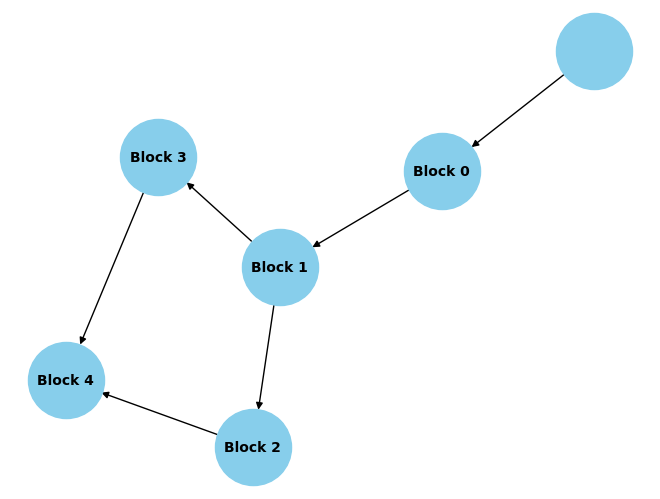

In [13]:
# Demo penggunaan dengan pencabangan
blockchain = BlockchainDAG()
pop = PoP()

validator1 = Validator("Validator1")
validator2 = Validator("Validator2")

pop.add_validator(validator1)
pop.add_validator(validator2)

# Simulating participation
validator1.participate()
validator2.participate()
validator2.participate()

selected_validator = pop.select_validator()
print(f"Selected Validator: {selected_validator.name}")

# Menambahkan beberapa blok untuk membentuk pencabangan
previous_hashes = [blockchain.get_latest_blocks()[0].hash]
new_block1 = Block(len(blockchain.chain), previous_hashes, time.time(), "Data Block 1", "")
blockchain.add_block(new_block1)

previous_hashes = [new_block1.hash]
new_block2 = Block(len(blockchain.chain), previous_hashes, time.time(), "Data Block 2", "")
blockchain.add_block(new_block2)

previous_hashes = [new_block1.hash]
new_block3 = Block(len(blockchain.chain), previous_hashes, time.time(), "Data Block 3", "")
blockchain.add_block(new_block3)

previous_hashes = [new_block2.hash, new_block3.hash]
new_block4 = Block(len(blockchain.chain), previous_hashes, time.time(), "Data Block 4", "")
blockchain.add_block(new_block4)

print("Blockchain is valid:", blockchain.is_chain_valid())

print("Blockchain JSON representation:")
print(blockchain.to_json())

# Visualisasi DAG
visualizer = BlockchainVisualizer(blockchain)
visualizer.build_graph()
visualizer.draw_graph()